**Import the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Data**

In [2]:
df=pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Check the Shape (Rows and Columns)**

In [3]:
df.shape

(180, 9)

**Check all the Columns name**

In [4]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

**Check the datatype and not null values of all the columns**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**To Ensure if there is any null value**

In [6]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Categorize the Continuous columns like Age, Education, Usage, Fitness, Income, Miles**

*To get the min and max value for all the Continuous columns one by one to categorize them*

**For Age**

In [7]:
df['Age'].agg(['min','max'])

min    18
max    50
Name: Age, dtype: int64

In [8]:
bins=[17,28,45,50]
labels=['Young (18-28)','Adult (28-45)','Old (Above 45)']

df['Age_Category']=pd.cut(df['Age'],bins,labels=labels)

**For Income**

In [9]:
df['Income'].agg(['min','max'])

min     29562
max    104581
Name: Income, dtype: int64

In [10]:
bins1=[29000,40000,75000,100000,110000]
labels1=['Lower (29K-40K)','Middle (40K-75K)','Upper Middle (75K-100K)','Upper (Above 100K)']
df['Income_Category']=pd.cut(df['Income'],bins1,labels=labels1)

**For Education**

In [11]:
df['Education'].agg(['min','max'])

min    12
max    21
Name: Education, dtype: int64

In [12]:
bins2=[11,14,17,22]
labels2=['Under Graduate','Graduate','Post Graduate']
df['Education_Category']=pd.cut(df['Education'],bins2,labels=labels2)

**DataFrame after the adding columns**

In [13]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category,Education_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Young (18-28),Lower (29K-40K),Under Graduate
1,KP281,19,Male,15,Single,2,3,31836,75,Young (18-28),Lower (29K-40K),Graduate
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young (18-28),Lower (29K-40K),Under Graduate
3,KP281,19,Male,12,Single,3,3,32973,85,Young (18-28),Lower (29K-40K),Under Graduate
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young (18-28),Lower (29K-40K),Under Graduate


**Checking the total counts of Products**

In [14]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

**Draw a Plot of Plots to show the numberr**

Text(0, 0.5, 'Total Numbers')

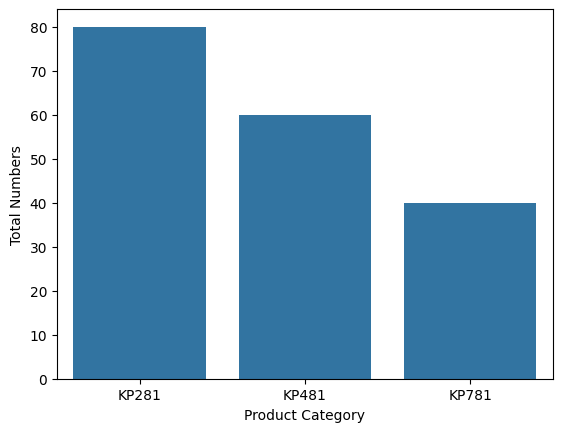

In [15]:
sns.countplot(x=df['Product'])
plt.xlabel("Product Category")
plt.ylabel("Total Numbers")


([<matplotlib.patches.Wedge at 0x18f2b921fd0>,
 [Text(-1.1817692794186039, 0.20837795042286444, 'KP281'),
  Text(0.7070662631386209, -0.8426489776479805, 'KP481'),
  Text(0.7070663702780942, 0.8426488877472997, 'KP781')],
 [Text(-0.6893654129941856, 0.12155380441333757, '44.44%'),
  Text(0.3856725071665204, -0.4596267150807166, '33.33%'),
  Text(0.38567256560623314, 0.4596266660439816, '22.22%')])

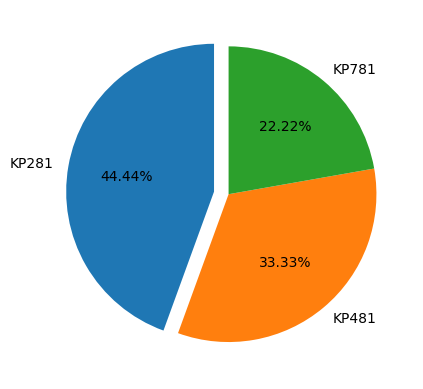

In [16]:
data_product = df['Product'].value_counts(normalize=True)
plt.pie(data_product.values,labels=['KP281','KP481','KP781'],autopct='%.2f%%',explode=(0.1,0,0),startangle=90)

**Insight - Most Selling product is KP281 which is 44.44%**

**Recommandation - We have to focus on Customers whos are purchasing KP281**

Text(0, 0.5, 'Total Numbers')

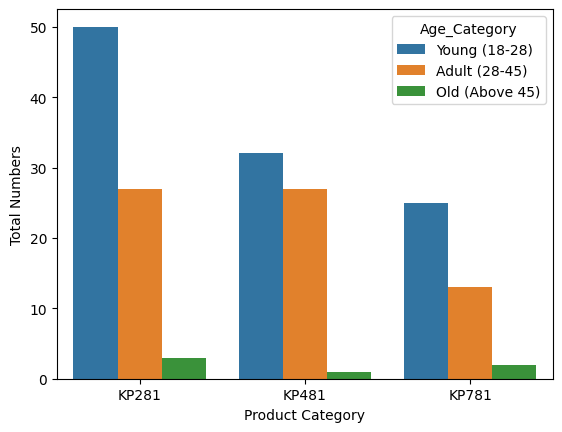

In [17]:
sns.countplot(x=df['Product'],hue=df['Age_Category'])
plt.xlabel("Product Category")
plt.ylabel("Total Numbers")


**Insight - Most of the customers of the Products are Young between 18-28 age group and they mostly purchase KP281**

**Recommandation - we need to focus on customers between 18-28 to make the strategy to sell these products**

Text(0, 0.5, 'Total Numbers')

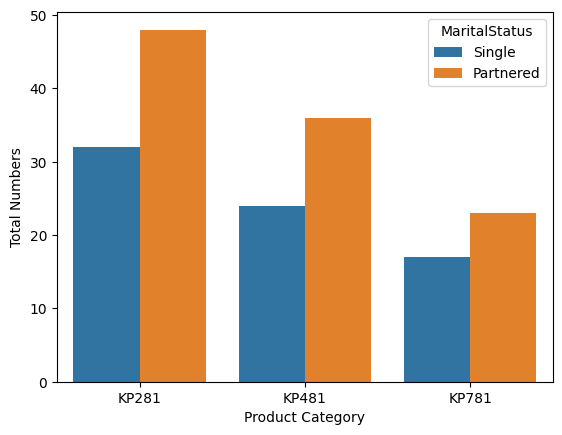

In [18]:
sns.countplot(x=df['Product'],hue=df['MaritalStatus'])
plt.xlabel("Product Category")
plt.ylabel("Total Numbers")


**Insight - As per the Chart most of the Customers are Partnered for all the Products**

**Recommandation - We should be more focused on Partnered customers**

Text(0, 0.5, 'Total Numbers')

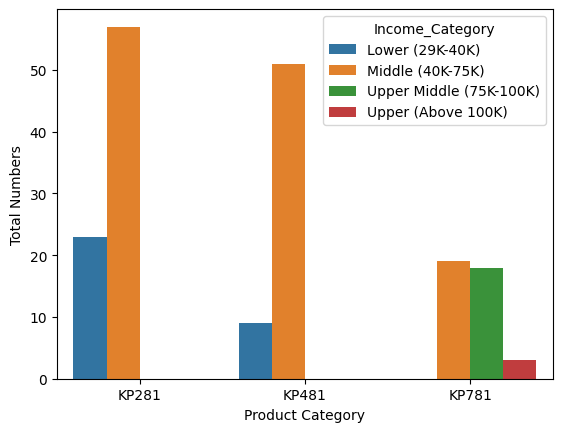

In [19]:
sns.countplot(x=df['Product'],hue=df['Income_Category'])
plt.xlabel("Product Category")
plt.ylabel("Total Numbers")


**Insight - Middle Class Customers in between the Income range 40K-75K purchase most of the Products of each Category**

**Insight - Upper Middle & Upper class never go to any product other than KP781 and Lower don't go for KP781 as it's cost is high**

**Recommandation - for KP281 & KP481, we need to focus on Middle first and then Lower but for KP781 we can focus on Upper Middle and Upper class too along with Middle**

Text(0, 0.5, 'Total Numbers')

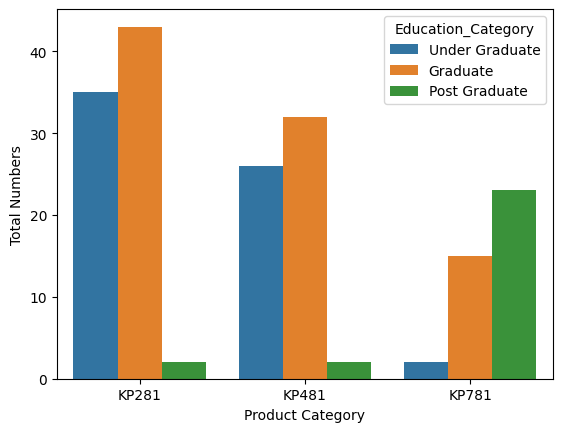

In [20]:
sns.countplot(x=df['Product'],hue=df['Education_Category'])
plt.xlabel("Product Category")
plt.ylabel("Total Numbers")


**Insight - Graduate and Under Graduate always prefer KP281 & KP481 and Post Graduates always prefer KP781**

**Recommandation - we need to focus on the Under Graduates and Graduates for KP281 & KP481 and Post Graduates for KP781**

Text(0, 0.5, 'Total Numbers')

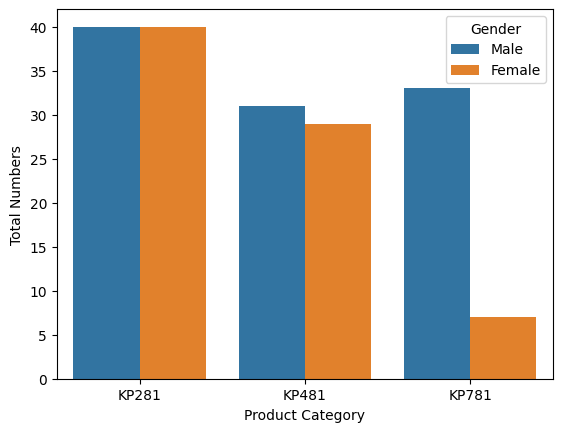

In [21]:
sns.countplot(x=df['Product'],hue=df['Gender'])
plt.xlabel("Product Category")
plt.ylabel("Total Numbers")


**Insight - Male and Female both like KP281 & KP481 but Most of the Female don't like or purchase KP781**

**Recommandation - We should focus on Male for KP781**

Text(0, 0.5, 'Total Numbers')

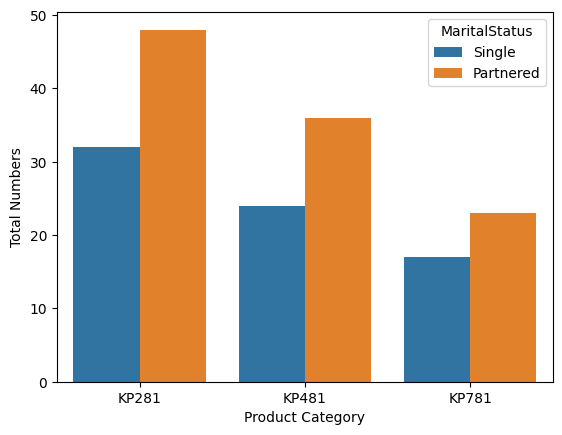

In [22]:
sns.countplot(x=df['Product'],hue=df['MaritalStatus'])
plt.xlabel("Product Category")
plt.ylabel("Total Numbers")


**Insight - Partnered customers purchase more Product for each Category**

**Recommandation - we should focus on Partnered customers in each Product Category**

In [23]:
data_gender=df['Gender'].value_counts(normalize=True)
data_gender

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x18f2bae1be0>,
 [Text(-1.1643547634276372, -0.2903067082989493, 'Male'),
  Text(1.0673252399908242, 0.2661143214457457, 'Female')],
 [Text(-0.6792069453327882, -0.16934557984105375, '57.78%'),
  Text(0.5821774036313586, 0.14515326624313402, '42.22%')])

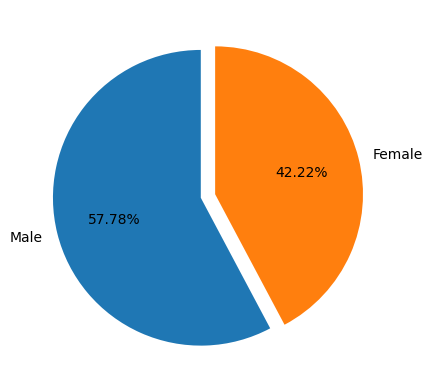

In [27]:
plt.pie(data_gender.values,labels=['Male','Female'],autopct='%.2f%%',explode=(0.1,0),startangle=90)

**Insight - Out of all Customers, Probability of Male and Female are 0.5778 & 0.4222**

**Recommandation - Although both Male and Female are good consumers but out of these we should target on Male**

Age_Category
Young (18-28)     0.594444
Adult (28-45)     0.372222
Old (Above 45)    0.033333
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x18f2d3e2d50>,
 [Text(-1.1475655969093241, -0.3508464062665407, 'Adult'),
  Text(1.0797897930802938, 0.20989045418888558, 'Young'),
  Text(0.11498081286296255, 1.0939741371135665, 'Old')],
 [Text(-0.6694132648637724, -0.20466040365548205, '59.44%'),
  Text(0.5889762507710692, 0.11448570228484667, '37.22%'),
  Text(0.06271680701616138, 0.596713165698309, '3.33%')])

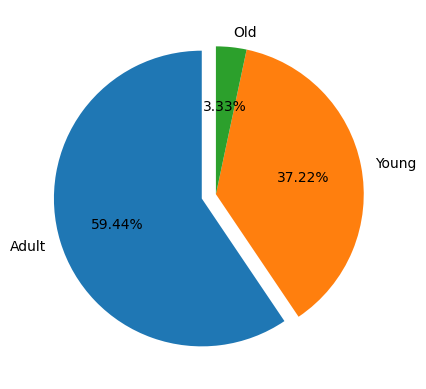

In [28]:
data_age = df['Age_Category'].value_counts(normalize=True)
print(data_age)
plt.pie(data_age.values,labels=['Adult','Young','Old'],autopct='%.2f%%',explode=(0.1,0,0),startangle=90)

**Insight - As per the above chart, Probability of Adult, Young and Old Customers are 0.5944, 0.3722 & 0.0333 so Adults are best consumers of the products**

**Recommandation - We need to focus on Adult and then Young**

([<matplotlib.patches.Wedge at 0x2a0cb026240>,
 [Text(-0.9583626076861709, -0.7221780335824144, 'Lower'),
  Text(1.057387858355152, 0.3032011164278675, 'Middle'),
  Text(0.44740950050176576, 1.0049003626533133, 'Upper Middle'),
  Text(0.05756937885987867, 1.0984924972969492, 'Upper')],
 [Text(-0.5590448544835996, -0.42127051958974165, '70.56%'),
  Text(0.5767570136482646, 0.16538242714247317, '17.78%'),
  Text(0.24404154572823583, 0.5481274705381708, '10.00%'),
  Text(0.03140147937811563, 0.5991777257983358, '1.67%')])

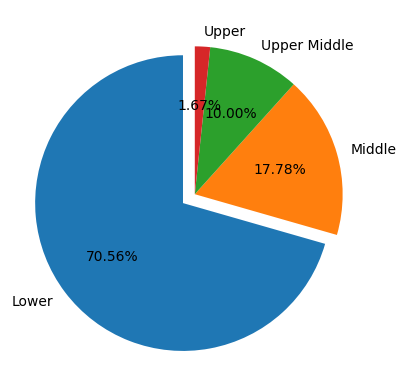

In [73]:
data_income = df['Income_Category'].value_counts(normalize=True)
plt.pie(data_income.values,labels=['Lower','Middle','Upper Middle','Upper'],autopct='%.2f%%',explode=(0.1,0,0,0),startangle=90)

**Insight - As per the above chart, Probability of Lower, Middle, Upper Middle & Upper class are 0.7056, 0.1778, 0.1000 & 0.0167 so Lower Class Customers are main consumers of the products**

**Recommandation - Lower Category is the highest category in all so we have to focus on this Category**

Text(0.5, 1.0, 'Miles Graph')

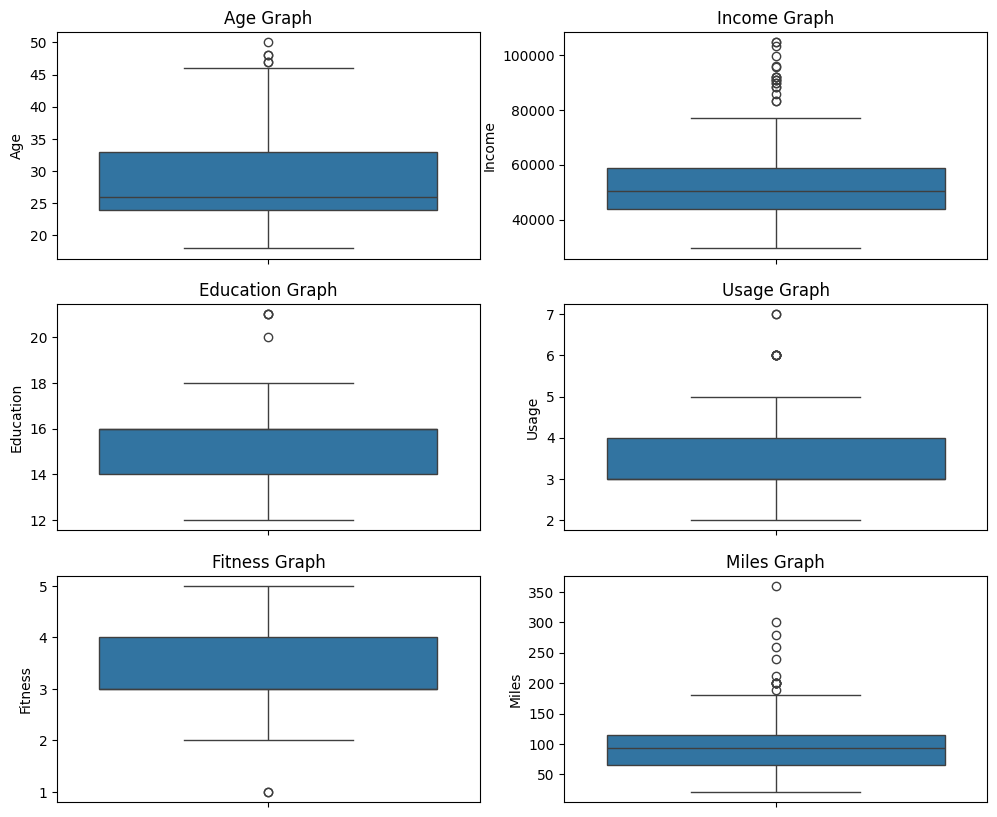

In [6]:
fig,ax=plt.subplots(3,2,figsize=(12,10))
sns.boxplot(y='Age', data=df, ax=ax[0, 0])
ax[0, 0].set_title("Age Graph")
sns.boxplot(y='Income', data=df, ax=ax[0, 1])
ax[0, 1].set_title("Income Graph")
sns.boxplot(y='Education', data=df, ax=ax[1, 0])
ax[1, 0].set_title("Education Graph")
sns.boxplot(y='Usage', data=df, ax=ax[1, 1])
ax[1,1].set_title("Usage Graph")
sns.boxplot(y='Fitness', data=df, ax=ax[2, 0])
ax[2, 0].set_title("Fitness Graph")
sns.boxplot(y='Miles', data=df, ax=ax[2, 1])
ax[2, 1].set_title("Miles Graph")

**Insight - As per the above subplots Insights are mentioned below**

**Age - There are less outliers and most of the Customers are in between 25-33**

**Income - There is a lot of outliers and most of the Customers are in between 42000 to 60000**

**Education - There are less outliers and most of the Customers are in between 14-16**

**Usage - There are less outliers and most of the Customers are in between 3-4**

**Fitness - There are less outliers and most of the Customers are in between 3-4**

**Miles - There is a lot of outliers and most of the Customers are in between 60-110**

<Axes: xlabel='Gender', ylabel='Product'>

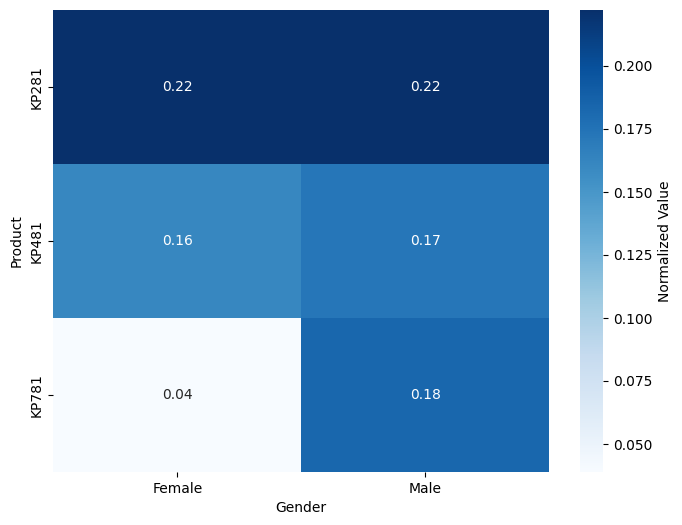

In [76]:
gender_data = pd.crosstab(df['Product'], df['Gender'],normalize=True)
plt.figure(figsize=(8, 6))
sns.heatmap(gender_data, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Normalized Value'})



**Insight - Above Heatmap shows the relationship between Product and Gender**

**Male - 22% like KP281, 17% like KP481 and 18% like KP781**

**Female - 22% like KP281, 16% like KP481 and only 4% like KP781**

**Recommandation - We should target on KP281 because mostly Male and Female like this product**

<Axes: xlabel='Age_Category', ylabel='Product'>

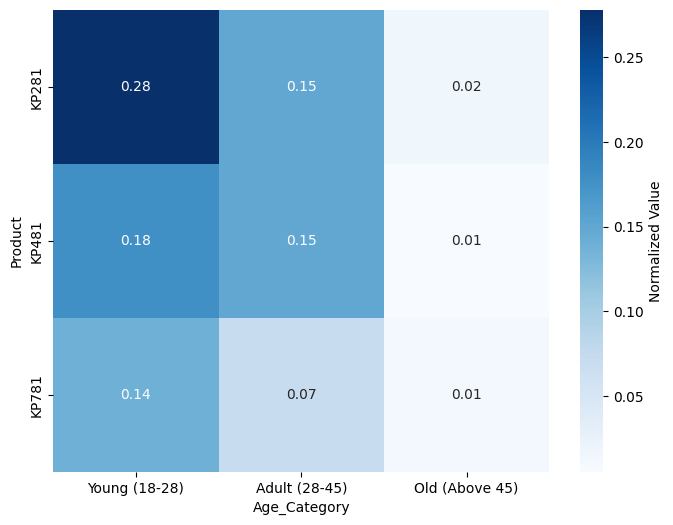

In [77]:
age_data = pd.crosstab(df['Product'], df['Age_Category'],normalize=True)
plt.figure(figsize=(8,6))
sns.heatmap(age_data, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Normalized Value'})



**Insight - Above Heatmap shows the relationship between Product and Age_Category.**

**Young - 28% like KP281, 18% like KP481 and 14% like KP781**

**Adult - 15% like KP281, 15% like KP481 and only 7% like KP781**

**Recommandation - We should Target on Adult for KP281**

<Axes: xlabel='Education_Category', ylabel='Product'>

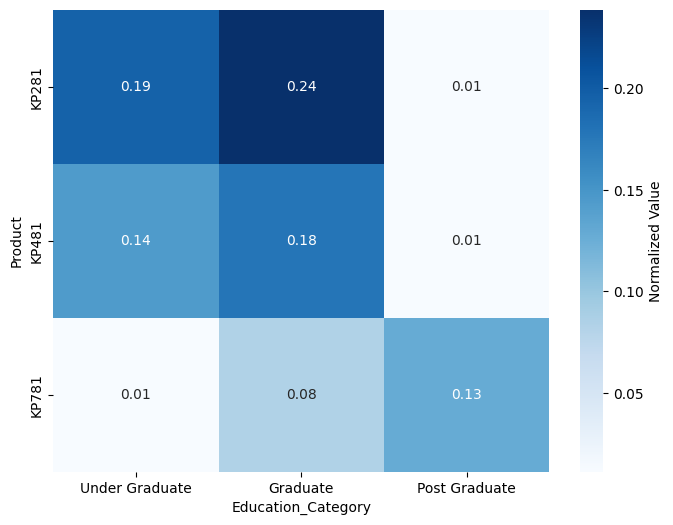

In [78]:
education_data = pd.crosstab(df['Product'], df['Education_Category'],normalize=True)
plt.figure(figsize=(8, 6))
sns.heatmap(education_data, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Normalized Value'})



**Insight - Above Heatmap shows the relationship between Product and Education_Category.**

**Under Graduate - 19% like KP281,14% like KP481 & only 1% like KP781.**

**Graduate - 24% like KP281,18% like KP481 & only 8% like KP781.**

**Post Graduate - 1% like KP281,1% like KP481 & 13% like KP781.**

**Recommandation - We should Target on KP281 for Graduates**

<Axes: xlabel='MaritalStatus', ylabel='Product'>

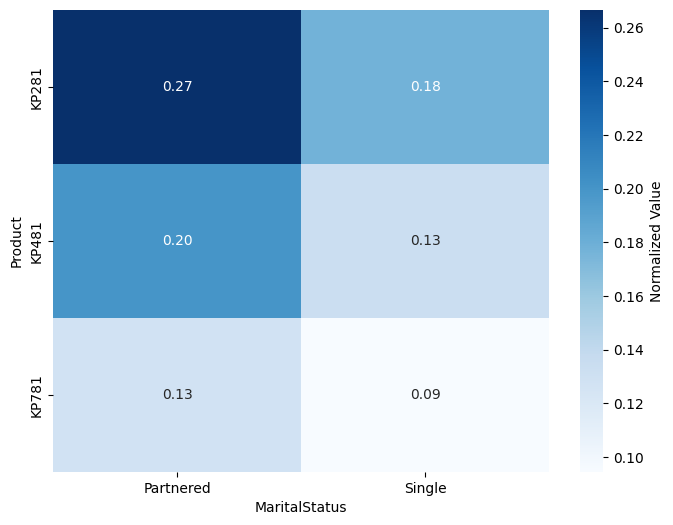

In [79]:
marital_data = pd.crosstab(df['Product'], df['MaritalStatus'],normalize=True)
plt.figure(figsize=(8,6))
sns.heatmap(marital_data, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Normalized Value'})



**Insight - Above Heatmap shows the relationship between Product and MaritalStatus.**

**Partnered - 27% like KP281, 20% like KP481 & 13% like KP781.**

**Single - 18% like KP281, 13% like KP481 & 9% like KP781**

**Recommandation - We should Target on KP281 for Partnered**

<Axes: xlabel='Income_Category', ylabel='Product'>

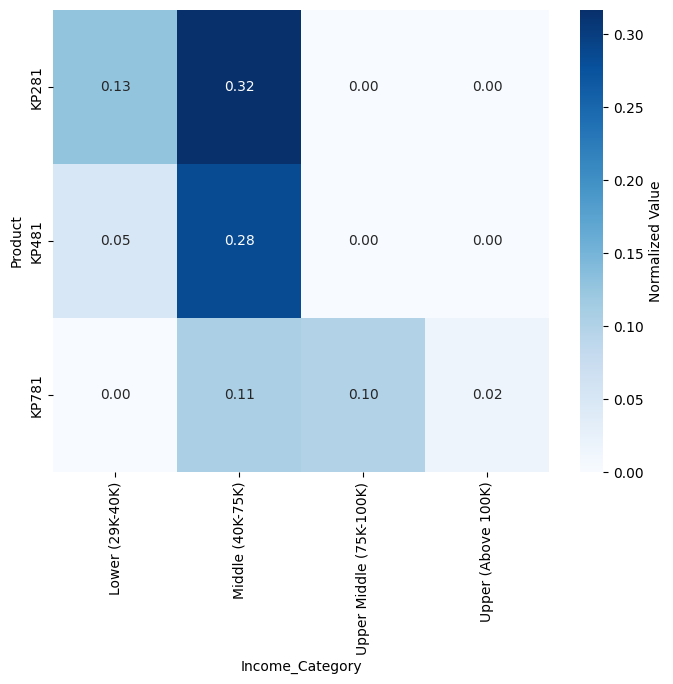

In [33]:
income_data = pd.crosstab(df['Product'], df['Income_Category'],normalize=True)
plt.figure(figsize=(8,6))
sns.heatmap(income_data, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Normalized Value'})



**Insight - Above Heatmap shows the relationship between Product and Income_Category. KP281 & KP481 has the good relation between Middle Class with 0.32 & 0.28**

**Recommandation - Middle Class customers consumes most of the products specially KP281 and KP481**

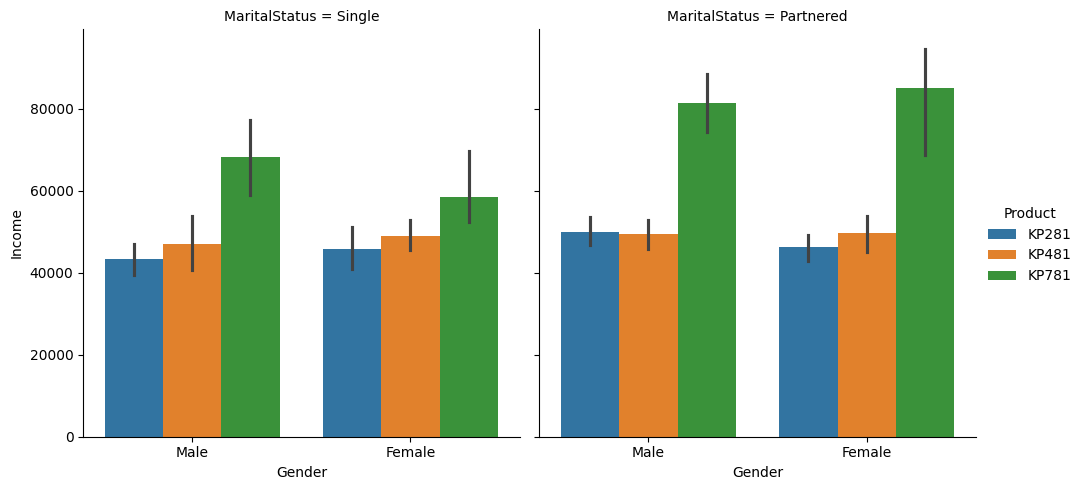

In [38]:
sns.catplot(x=df['Gender'],y=df['Income'],hue=df['Product'],col=df['MaritalStatus'],kind='bar')

**Insight - It shows the relationship between Gender and Income with other parameters like MaritalStatus and Product**

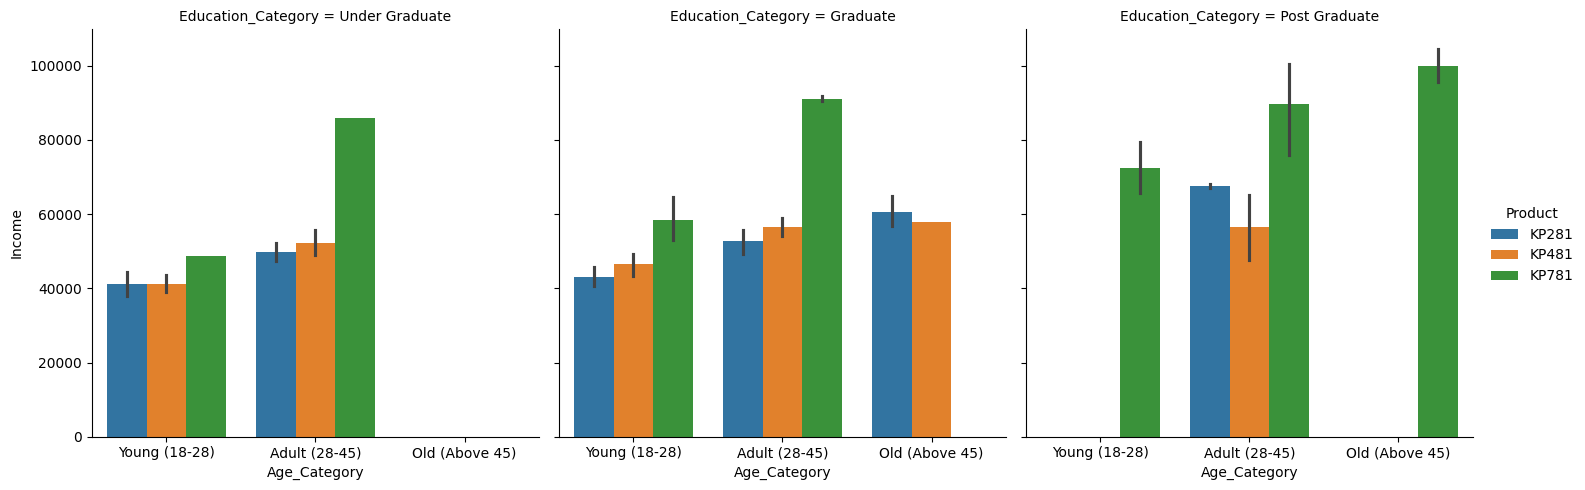

In [43]:
sns.catplot(x=df['Age_Category'],y=df['Income'],hue=df['Product'],col=df['Education_Category'],kind='bar')

**Insight - It shows the relationship between Age_Category and Income with other parameters like Education_Category and Product**

<Axes: xlabel='Gender', ylabel='Product'>

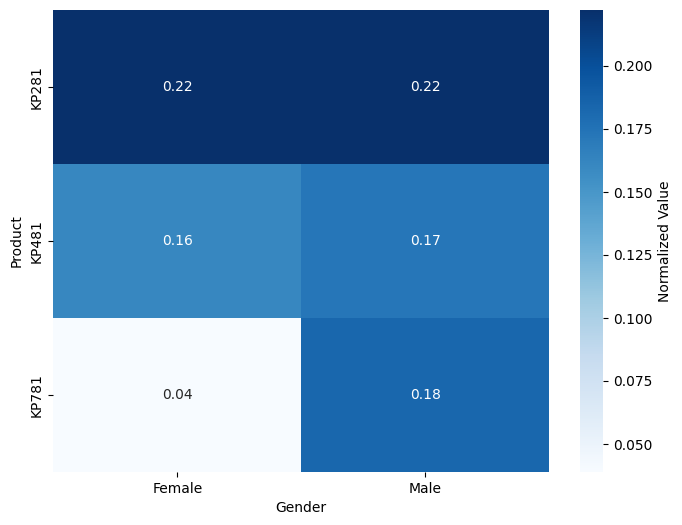

In [44]:
gender_data = pd.crosstab(df['Product'], df['Gender'],normalize=True)
plt.figure(figsize=(8, 6))
sns.heatmap(gender_data, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Normalized Value'})



**Insight - 18% Male like KP781, 17% Male like KP481 and 22% Male like KP281 and only 4% Female like KP781, 16% Female like KP481 and 22% Female like KP281**

**Recommandation - We should Target on Male and Female both for KP281**

In [39]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category,Education_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Young (18-28),Lower (29K-40K),Under Graduate
1,KP281,19,Male,15,Single,2,3,31836,75,Young (18-28),Lower (29K-40K),Graduate
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young (18-28),Lower (29K-40K),Under Graduate
3,KP281,19,Male,12,Single,3,3,32973,85,Young (18-28),Lower (29K-40K),Under Graduate
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young (18-28),Lower (29K-40K),Under Graduate
